In [1]:
import tensorflow as tf
import os
import cv2
import imghdr

import numpy as np
from matplotlib import pyplot as plt

C:\Users\Admin\AppData\Local\Temp\ipykernel_5740\2452807622.py:4: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [4]:
data_dir = r"D:\dungnd\data\CASIA_CNN"

train_data = os.path.join(data_dir,'train')
valid_data = os.path.join(data_dir,'val')

class_names = ['Tp', 'Au']

train = tf.keras.utils.image_dataset_from_directory(train_data,class_names=class_names)
valid = tf.keras.utils.image_dataset_from_directory(valid_data,class_names=class_names)

Found 7643 files belonging to 2 classes.
Found 1912 files belonging to 2 classes.


In [5]:
train = train.map(lambda x,y: (x/255, y))
valid = valid.map(lambda x,y: (x/255, y))

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras import layers, models

In [11]:
model = Sequential()

# Input Layer
model.add(Conv2D(32,(3,3),activation='relu',input_shape = (256, 256, 3))) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Bloack 1 
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
# Block 2
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
# Block 3
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Fully Connected layers 
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Output layer
model.add(Dense(1, activation='sigmoid'))

model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_10 (Ba  (None, 254, 254, 32)      128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 127, 127, 32)      0         
                                                                 
 conv2d_9 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_11 (Ba  (None, 125, 125, 64)     

In [12]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                 factor=0.2,
                                                 patience=3)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=5,
                                                    restore_best_weights=True)
checkpoint_filepath = r'D:\dungnd\GraduationProject\checkpoint\casia2_cnn\model_epoch_{epoch:02d}_val_accuracy_{val_accuracy:.4f}.h5'

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min', #minimize the loss value
    save_best_only=True)

hist = model.fit(train, epochs=30, validation_data=valid, callbacks=[reduce_lr, checkpoint_cb])

Epoch 1/30
239/239 [==============================] - 887s 4s/step - loss: 0.6404 - accuracy: 0.7213 - val_loss: 0.6246 - val_accuracy: 0.7563 - lr: 0.0010
Epoch 2/30
239/239 [==============================] - 897s 4s/step - loss: 0.5134 - accuracy: 0.7723 - val_loss: 0.6537 - val_accuracy: 0.6098 - lr: 0.0010
Epoch 3/30
239/239 [==============================] - 917s 4s/step - loss: 0.4862 - accuracy: 0.7820 - val_loss: 0.5271 - val_accuracy: 0.7578 - lr: 0.0010
Epoch 4/30
239/239 [==============================] - 916s 4s/step - loss: 0.4668 - accuracy: 0.7880 - val_loss: 0.5279 - val_accuracy: 0.7887 - lr: 0.0010
Epoch 5/30
239/239 [==============================] - 903s 4s/step - loss: 0.4442 - accuracy: 0.8013 - val_loss: 0.5015 - val_accuracy: 0.7646 - lr: 0.0010
Epoch 6/30
239/239 [==============================] - 886s 4s/step - loss: 0.4126 - accuracy: 0.8100 - val_loss: 0.4916 - val_accuracy: 0.7908 - lr: 0.0010
Epoch 7/30
239/239 [==============================] - 885s 4s/st

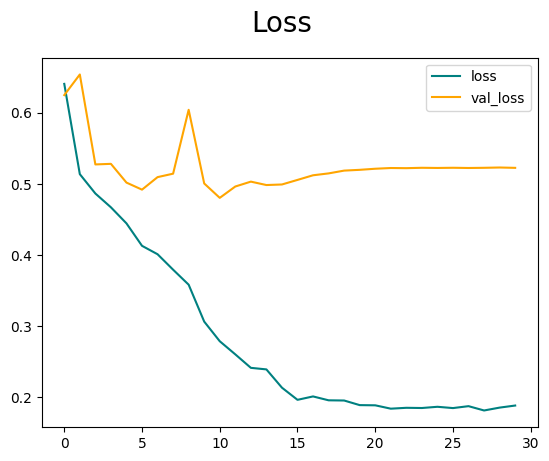

In [13]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper right")
plt.show()

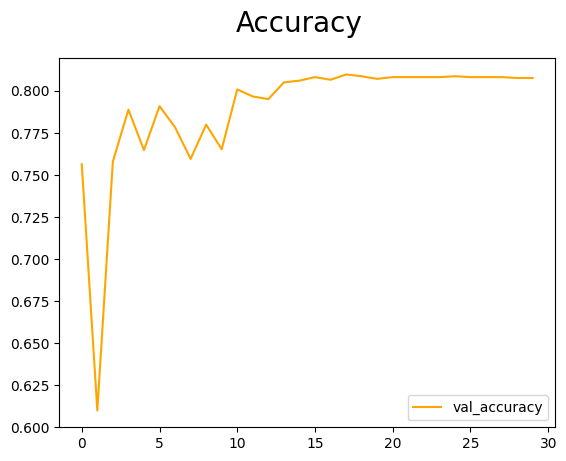

In [15]:
fig = plt.figure()
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="lower right")
plt.show()